# Single Particle


Simulate the trajectory of an individual point, first in a perfectly circular flow (a.k.a. solid body rotation). Then add a convergent term to obtain a spiraling trajectory, and a constant vertical velocity for the third dimension. These simple flow configurations can be thought of as idealized models e.g. ocean meso-scale eddies.

For additional documentation e.g. see :
[1](https://JuliaClimate.github.io/IndividualDisplacements.jl/dev/),
[2](https://JuliaClimate.github.io/MeshArrays.jl/dev/),
[3](https://docs.juliadiffeq.org/latest/solvers/ode_solve.html),
[4](https://en.wikipedia.org/wiki/Displacement_(vector))

![solid body rotation](https://github.com/JuliaClimate/IndividualDisplacements.jl/raw/master/examples/figs/SolidBodyRotation.gif)

# 1 Problem Configuration

Here we set up software, grid, flow fields, initial conditions.

### 1.1 Import Software

In [1]:
using OrdinaryDiffEq, Plots, DataFrames
using IndividualDisplacements, MeshArrays

### 1.2  Gridded Domain

In [2]:
np,nz=16,4 #horizontal and vertical domain size
Γ=simple_periodic_domain(np)
γ=Γ["XC"].grid;

### 1.3 Velocity Fields

In [3]:
#Solid-body rotation around central location ...
i=Int(np/2+1)
u=-(Γ["YG"].-Γ["YG"][1][i,i])
v=(Γ["XG"].-Γ["XG"][1][i,i])

#... plus a convergent term to / from central location
d=-0.01
u=u+d*(Γ["XG"].-Γ["XG"][1][i,i])
v=v+d*(Γ["YG"].-Γ["YG"][1][i,i])

#Replicate u,v in vertical dimension
uu=MeshArray(γ,γ.ioPrec,nz)
[uu[k]=u[1] for k=1:nz]
vv=MeshArray(γ,γ.ioPrec,nz)
[vv[k]=v[1] for k=1:nz]

#Vertical velocity component w
w=fill(1.0,MeshArray(γ,γ.ioPrec,nz));

### 1.4 Initial Positions

In [4]:
📌=[np*1/3,np*1/3,nz*1/3]

3-element Array{Float64,1}:
 5.333333333333333
 5.333333333333333
 1.3333333333333333

## 2 Trajectory Simulations

Here we turn our problem configuration in a struct (`Individuals`) which contains the initial positions, flow fields, and all that will be necesssary to compute trajectories over time (`∫!(𝐼,𝑇)`).

### 2.1 Setup Individuals

In [5]:
𝑃=(u0=uu, u1=uu, v0=vv, v1=vv,w0=0.0*w, w1=-0.01*w, 𝑇=[0,19.95*2*pi], ioSize=(np,np,nz))

tr = DataFrame([fill(Int, 1) ; fill(Float64, 4)], [:ID, :x, :y, :z, :t])
solv(prob) = solve(prob,Tsit5(),reltol=1e-8)

function postproc(sol,𝑃::NamedTuple;id=missing,𝑇=missing)
    df=postprocess_xy(sol,𝑃,id=id,𝑇=𝑇)
    #add third coordinate
    z=sol[3,:,:]
    df.z=z[:]
    return df
 end

𝐼 = Individuals{Float64}(📌=📌[:,:], 🔴=tr, 🆔=collect(1:size(📌,2)),
                         🚄 = dxyz_dt, ∫ = solv, 🔧 = postproc, 𝑃=𝑃);

### 2.2 Compute Trajectories

The `∫!` function call below returns the final positions & updates `𝐼.📌` accordingly. It also records properties observed along the trajectory in `𝐼.🔴`

In [6]:
𝑇=(0.0,𝐼.𝑃.𝑇[2])
∫!(𝐼,𝑇)

3×1 Array{Float64,2}:
 7.767441577479032
 9.513402495574852
 0.7065855989421701

### 2.3 Visualize Trajectories

- define `myplot` convenience function
- generate animation using `myplot`
- single plot example using `myplot`

In [7]:
myplot(i)=plot(𝐼.🔴.x[1:i],𝐼.🔴.y[1:i],𝐼.🔴.z[1:i],linewidth=2,arrow = 2,
    title="Solid body rotation / Spiral example",leg=false,
    xaxis="x",yaxis="y",zaxis="z",xlims=(0,np),ylims=(0,np));

Animation example:

/home/travis/.julia/packages/GR/BwGt2/src/../deps/gr/bin/gksqt: error while loading shared libraries: libQt5Widgets.so.5: cannot open shared object file: No such file or directory
connect: Connection refused
GKS: can't connect to GKS socket application

GKS: Open failed in routine OPEN_WS
GKS: GKS not in proper state. GKS must be either in the state WSOP or WSAC in routine ACTIVATE_WS
/home/travis/.julia/packages/GR/BwGt2/src/../deps/gr/bin/gksqt: error while loading shared libraries: libQt5Widgets.so.5: cannot open shared object file: No such file or directory
connect: Connection refused
GKS: can't connect to GKS socket application

GKS: Open failed in routine OPEN_WS
GKS: GKS not in proper state. GKS must be either in the state WSOP or WSAC in routine ACTIVATE_WS
/home/travis/.julia/packages/GR/BwGt2/src/../deps/gr/bin/gksqt: error while loading shared libraries: libQt5Widgets.so.5: cannot open shared object file: No such file or directory
connect: Connection refused
GKS: can't conne

Plots.AnimatedGif("/tmp/SolidBodyRotation.gif")
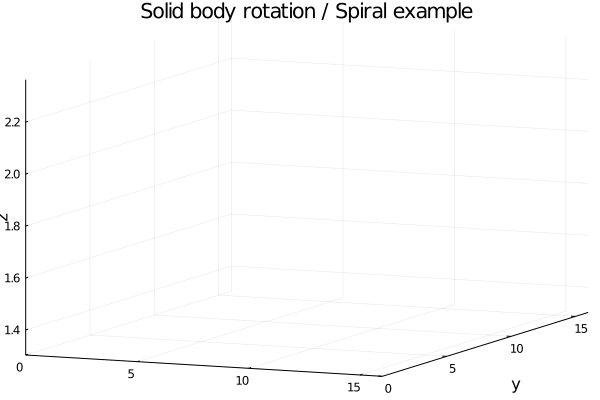

In [8]:
nt=length(𝐼.🔴.x)
p=Int(ceil(nt/100))
anim = @animate for i ∈ 1:p:nt
    myplot(i)
end

pth=tempdir()*"/"
gif(anim, pth*"SolidBodyRotation.gif", fps = 15)

Single plot example:

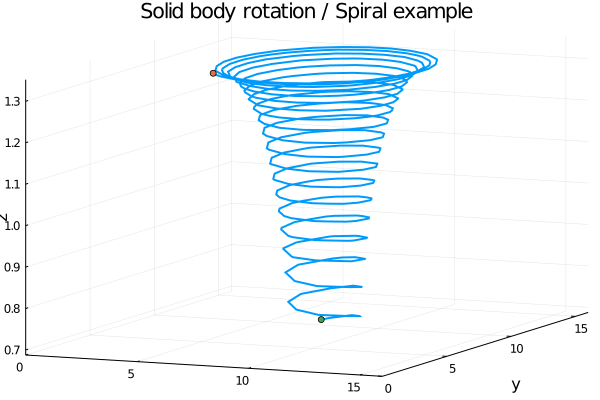

In [9]:
plt=myplot(nt)
scatter!(plt,[📌[1]],[📌[2]],[📌[3]])
#scatter!(plt,[𝐼.🔴.x[end]],[𝐼.🔴.y[end]],[𝐼.🔴.z[end]])
scatter!(plt,[𝐼.📌[1]],[𝐼.📌[2]],[𝐼.📌[3]])

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*